In [2]:
a = [1,2,3,4]
b = [5,6,7,8]
c = [1,2,3,4,5,6]
a + b + c

[1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6]

In [3]:
a = {'teste': 'teste'}

if a['teste']:
    print('Sucesso!')


Sucesso!


In [1]:
def meu_decorador(funcao):
    def funcao_decorada(*args, **kwargs):
        print("Código executado antes da função original")
        resultado = funcao(*args, **kwargs)
        print("Código executado depois da função original")
        return resultado

    return funcao_decorada

# Uso do decorador
@meu_decorador
def minha_funcao():
    print("Função original executada")

# Chamada da função decorada
minha_funcao()

Código executado antes da função original
Função original executada
Código executado depois da função original


In [2]:
import requests
import time

def decorador_retry(max_tentativas=3, intervalo_tentativas=1):
    def decorator(funcao):
        def wrapper(*args, **kwargs):
            tentativas = 0

            while tentativas < max_tentativas:
                try:
                    resultado = funcao(*args, **kwargs)
                    # Personalize esta condição de acordo com o resultado desejado
                    if resultado and 'error' not in resultado:  
                        return resultado
                    else:
                        print(f"Tentativa {tentativas + 1}: Falha na API. Aguardando {intervalo_tentativas} segundos antes da próxima tentativa.")
                except Exception as e:
                    print(f"Tentativa {tentativas + 1}: Exceção ocorrida - {str(e)}. Aguardando {intervalo_tentativas} segundos antes da próxima tentativa.")

                tentativas += 1
                time.sleep(intervalo_tentativas)

            print(f"Atingido o número máximo de tentativas ({max_tentativas}).")
            return None

        return wrapper

    return decorator

# Uso do decorador
@decorador_retry(max_tentativas=5, intervalo_tentativas=2)
def getPoolHistory(poolId):
    with requests.Session() as session:
        url = f"https://cardano-mainnet.blockfrost.io/api/v0/pools/{poolId}/history"
        payload = {}
        headers = {'project_id': "mainnet1GXLEXTxi8Hri8AdckHwJCXPrymRQwls"}
        response = session.get(url, headers=headers, data=payload)
        return response.json()

# Exemplo de chamada da função decorada
resultado = getPoolHistory("483b0d11a79c52d088f93e8a0930999c1bb17f2b04b26c7167d9bb0e")
print(f"Resultado final: {resultado}")


Resultado final: [{'epoch': 329, 'blocks': 51, 'active_stake': '63557432994809', 'active_size': 0.002583778705737251, 'delegators_count': 2, 'rewards': '33797889126', 'fees': '2012894456'}, {'epoch': 330, 'blocks': 59, 'active_stake': '64000000000000', 'active_size': 0.0026029609232207447, 'delegators_count': 2, 'rewards': '38963136517', 'fees': '2271156825'}, {'epoch': 331, 'blocks': 41, 'active_stake': '64000000000000', 'active_size': 0.0025946887424938164, 'delegators_count': 2, 'rewards': '27061860088', 'fees': '1676093004'}, {'epoch': 332, 'blocks': 31, 'active_stake': '64031784994670', 'active_size': 0.00258946102146318, 'delegators_count': 2, 'rewards': '20488600113', 'fees': '1347430005'}, {'epoch': 333, 'blocks': 43, 'active_stake': '64036691979692', 'active_size': 0.0025911032761557276, 'delegators_count': 2, 'rewards': '28334495347', 'fees': '1739724767'}, {'epoch': 334, 'blocks': 38, 'active_stake': '64025385767084', 'active_size': 0.0025841562864961647, 'delegators_count':

In [6]:
import requests
import time

def decorador_retry(attempts=3, wait_secs=1):
    def decorator(func):
        def wrapper(*args, **kwargs):
            attempt = 0

            while attempt < attempts:
                try:
                    result = func(*args, **kwargs)
                    # Personalize esta condição de acordo com o result desejado
                    if result and 'error' not in result:  
                        return result
                    else:
                        print(f"Tentativa {attempt + 1}: Falha na API. Aguardando {wait_secs} segundos antes da próxima tentativa.")
                except Exception as e:
                    print(f"Tentativa {attempt + 1}: Exceção ocorrida - {str(e)}. Aguardando {wait_secs} segundos antes da próxima tentativa.")

                attempt += 1
                time.sleep(wait_secs)

            print(f"Atingido o número máximo de attempt ({attempts}).")
            return None

        return wrapper

    return decorator

@decorador_retry(attempts=5, wait_secs=2)
def getPoolHistory(poolId):
    with requests.Session() as session:

        result_list = []
        page = 1

        while True:
            url = f"https://cardano-mainnet.blockfrost.io/api/v0/pools/{poolId}/history?page={page}"
            response = session.get(url, headers={'project_id': "mainnet1GXLEXTxi8Hri8AdckHwJCXPrymRQwls"})

            if response.status_code == 200:
                data = response.json()

                # Verificar se a lista está vazia
                if not data:
                    print(f"Lista vazia na página {page}. Interrompendo a requisição.")
                    break
                else:
                    print(f"data recebidos da página {page}")
                    result_list.extend(data)

            else:
                print(f"Falha na requisição da página {page}. Código de status: {response.status_code}")

            page += 1

        return result_list

# Exemplo de chamada da função decorada
pool_id = "483b0d11a79c52d088f93e8a0930999c1bb17f2b04b26c7167d9bb0e"
result = getPoolHistory(pool_id)
print(f"result final: {len(result)} itens.")


data recebidos da página 1
data recebidos da página 2
Lista vazia na página 3. Interrompendo a requisição.
result final: 133 itens.


In [5]:
import zipfile
import io
import os

def descompactar_zip_em_memoria(diretorio_entrada, tamanho_buffer=8192):
    # Lista todos os arquivos no diretório de entrada
    arquivos_zip = [f for f in os.listdir(diretorio_entrada) if f.endswith('.zip')]

    # Dicionário para armazenar os arquivos descompactados em memória
    arquivos_descompactados = {}

    for arquivo_zip in arquivos_zip:
        caminho_zip = os.path.join(diretorio_entrada, arquivo_zip)

        with zipfile.ZipFile(caminho_zip, 'r') as zip_ref:
            for nome_arquivo in zip_ref.namelist():
                with zip_ref.open(nome_arquivo) as arquivo:
                    # Leia e processe o conteúdo do arquivo em partes
                    conteudo_arquivo = b''
                    while True:
                        parte = arquivo.readline() #(tamanho_buffer)
                        if not parte:
                            break
                        conteudo_arquivo += parte
                        print(parte)
                        break

                    # Armazene o conteúdo no dicionário usando o nome do arquivo como chave
                    arquivos_descompactados[nome_arquivo] = conteudo_arquivo

        print(f'Arquivos descompactados de {caminho_zip}')

    return arquivos_descompactados

# Exemplo de uso
diretorio_entrada = '/home/antonio/binance-public-data/python/data/spot/daily/klines/ADAUSDT/1m/'

arquivos_em_memoria = descompactar_zip_em_memoria(diretorio_entrada)

# Agora você pode acessar o conteúdo dos arquivos em memória
for nome_arquivo, conteudo_arquivo in arquivos_em_memoria.items():
    print(f'Conteúdo do arquivo {nome_arquivo}:\n{conteudo_arquivo.decode("utf-8")}')



b'1704931200000,0.56620000,0.57250000,0.56540000,0.56580000,2160333.30000000,1704931259999,1227577.82457000,2391,1246351.00000000,707349.00639000,0\n'
Arquivos descompactados de /home/antonio/binance-public-data/python/data/spot/daily/klines/ADAUSDT/1m/ADAUSDT-1m-2024-01-11.zip
b'1664150400000,0.44620000,0.44630000,0.44580000,0.44590000,102489.60000000,1664150459999,45729.34966000,93,63930.80000000,28526.23373000,0\n'
Arquivos descompactados de /home/antonio/binance-public-data/python/data/spot/daily/klines/ADAUSDT/1m/ADAUSDT-1m-2022-09-26.zip
b'1605916800000,0.11826000,0.11834000,0.11809000,0.11818000,949531.20000000,1605916859999,112238.82041800,155,532832.40000000,62979.91693300,0\n'
Arquivos descompactados de /home/antonio/binance-public-data/python/data/spot/daily/klines/ADAUSDT/1m/ADAUSDT-1m-2020-11-21.zip
b'1705104000000,0.54770000,0.54890000,0.54720000,0.54860000,305250.90000000,1705104059999,167213.41040000,337,169816.40000000,93002.75270000,0\n'
Arquivos descompactados de /ho

In [2]:
from whales import engine, db_path
from sqlalchemy.orm import Session
from sqlalchemy import text
from models.histpricemodel import HistPrice

from datetime import datetime

with Session(engine) as session:
    _query = text("SELECT MAX (closetime) FROM histprice;")
    resultados = session.execute(_query).scalar()
    print(f"Timestamp: {resultados}, Date: {datetime.utcfromtimestamp(resultados / 1000)}")


2024-03-16 16:44:53,199 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-16 16:44:53,199 INFO sqlalchemy.engine.Engine SELECT MAX (closetime) FROM histprice;
2024-03-16 16:44:53,200 INFO sqlalchemy.engine.Engine [generated in 0.00042s] ()
Timestamp: 1710547199999, Date: 2024-03-15 23:59:59.999000
2024-03-16 16:44:53,361 INFO sqlalchemy.engine.Engine ROLLBACK


In [1]:
from whales import engine_futures, db_path_futures
from sqlalchemy.orm import Session
from sqlalchemy import text
from models.histpricemodel import HistPrice
import pandas as pd

from datetime import datetime



with Session(engine_futures) as session:
    _query = text("SELECT * FROM histprice;")
    #resultados = session.execute(_query).all()
    dados = pd.read_sql(sql=_query, con=engine_futures)
    #print(dados[:9])

Database already exists... continue...
2024-03-25 13:41:12,718 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-25 13:41:12,719 INFO sqlalchemy.engine.Engine SELECT * FROM histprice;
2024-03-25 13:41:12,719 INFO sqlalchemy.engine.Engine [generated in 0.00079s] ()


/tmp/ipykernel_5477/3530637548.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


2024-03-25 13:41:47,482 INFO sqlalchemy.engine.Engine ROLLBACK


In [2]:
with Session(engine_futures) as session:
    _query = text('SELECT * FROM histprice WHERE histprice.pair = "ADAUSDT";')
    #resultados = session.execute(_query).all()
    dados = pd.read_sql(sql=_query, con=engine_futures)
    #print(dados[:9])

2024-03-24 13:58:41,860 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-24 13:58:41,861 INFO sqlalchemy.engine.Engine SELECT * FROM histprice WHERE histprice.pair = "ADAUSDT";
2024-03-24 13:58:41,861 INFO sqlalchemy.engine.Engine [generated in 0.00109s] ()
2024-03-24 13:58:48,500 INFO sqlalchemy.engine.Engine ROLLBACK


In [3]:
dados[:10]

,id,pair,opentime,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,takerbuyquoteassetvolume,ignore
0,7770241,ADAUSDT,1704931200000,0.5662,0.5703,0.5653,0.5657,4785209.0,1704931259999,2.714607e+06,4937,2853545.0,1.618940e+06,0
1,7770242,ADAUSDT,1704931260000,0.5656,0.5656,0.5631,0.5631,1673648.0,1704931319999,9.446535e+05,2082,741913.0,4.187690e+05,0
2,7770243,ADAUSDT,1704931320000,0.5632,0.5645,0.5608,0.5616,2625933.0,1704931379999,1.476796e+06,2830,991986.0,5.582667e+05,0
3,7770244,ADAUSDT,1704931380000,0.5616,0.5663,0.5616,0.5657,1929218.0,1704931439999,1.088003e+06,2307,1069242.0,6.030065e+05,0
4,7770245,ADAUSDT,1704931440000,0.5657,0.5657,0.5634,0.5655,1384200.0,1704931499999,7.815940e+05,1767,689949.0,3.895506e+05,0
5,7770246,ADAUSDT,1704931500000,0.5655,0.5674,0.5642,0.5651,2232509.0,1704931559999,1.263336e+06,2329,1074882.0,6.083058e+05,0
6,7770247,ADAUSDT,1704931560000,0.5651,0.5690,0.5644,0.5687,2633695.0,1704931619999,1.491529e+06,2516,1255550.0,7.111722e+05,0
7,7770248,ADAUSDT,1704931620000,0.5686,0.5691,0.5661,0.5668,1516470.0,1704931679999,8.607014e+05,1587,678318.0,3.850200e+05,0
8,7770249,ADAUSDT,1704931680000,0.5667,0.5677,0.5635,0.5640,1483473.0,1704931739999,8.387484e+05,1669,689838.0,3.901944e+05,0
9,7770250,ADAUSDT,1704931740000,0.5639,0.5659,0.5638,0.5653,2381458.0,1704931799999,1.345079e+06,1839,1222264.0,6.903092e+05,0


In [17]:
dados.query("pair == 'ADAUSDT'")

,id,pair,opentime,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,takerbuyquoteassetvolume,ignore


In [4]:
edited_data = dados.copy()

In [5]:
edited_data['opentime'] = [datetime.fromtimestamp(time/1000) for time in edited_data['opentime']]
edited_data['closetime'] = [datetime.fromtimestamp(time/1000) for time in edited_data['closetime']]

In [6]:
mean_inf = edited_data['volume'].mean() - 1000
mean_sup = edited_data['volume'].mean() + 1000

In [7]:
edited_data.query(f"volume >= {mean_inf} & volume <= {mean_sup}")

,id,pair,opentime,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,takerbuyquoteassetvolume,ignore
1078,7771319,ADAUSDT,2024-01-11 17:58:00,0.58270,0.58430,0.58260,0.58420,507475.0,2024-01-11 17:58:59.999,296112.28400,826,214343.0,125078.46660,0
2069,7772310,ADAUSDT,2022-09-26 11:29:00,0.44610,0.44660,0.44610,0.44640,507981.0,2022-09-26 11:29:59.999,226725.72990,278,352376.0,157270.36820,0
3743,7773984,ADAUSDT,2020-11-21 14:23:00,0.12729,0.12768,0.12720,0.12752,508374.0,2020-11-21 14:23:59.999,64784.19378,250,286030.0,36445.15290,0
4031,7774272,ADAUSDT,2020-11-21 19:11:00,0.12822,0.12829,0.12810,0.12825,508113.0,2020-11-21 19:11:59.999,65145.23552,184,276826.0,35494.75332,0
4875,7775116,ADAUSDT,2024-01-13 09:15:00,0.54720,0.54730,0.54640,0.54710,507836.0,2024-01-13 09:15:59.999,277766.82110,695,244437.0,133717.83290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172374,9942615,ADAUSDT,2021-02-24 22:15:00,0.99707,1.00523,0.99707,1.00523,507916.0,2021-02-24 22:15:59.999,509218.23758,510,218066.0,218427.72104,0
2172534,9942775,ADAUSDT,2023-05-29 01:55:00,0.38490,0.38490,0.38460,0.38480,506661.0,2023-05-29 01:55:59.999,194935.25860,382,245852.0,94603.38240,0
2174511,9944752,ADAUSDT,2021-04-23 10:52:00,1.03027,1.03230,1.02924,1.03166,507869.0,2021-04-23 10:52:59.999,523571.07757,760,273839.0,282331.68835,0
2174917,9945158,ADAUSDT,2021-04-23 17:38:00,1.09414,1.09421,1.08806,1.09200,507998.0,2021-04-23 17:38:59.999,553926.90871,919,174596.0,190371.68899,0


<Axes: >

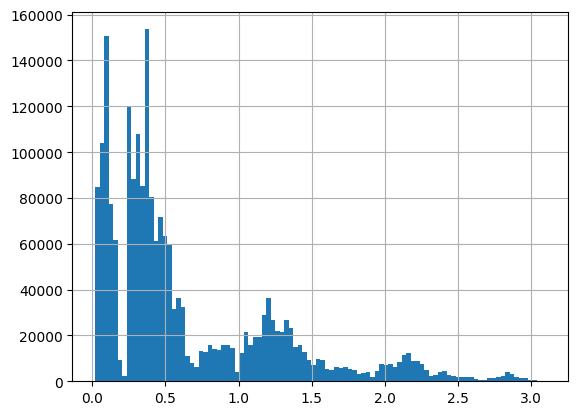

In [8]:
edited_data["close"].hist(bins=100)

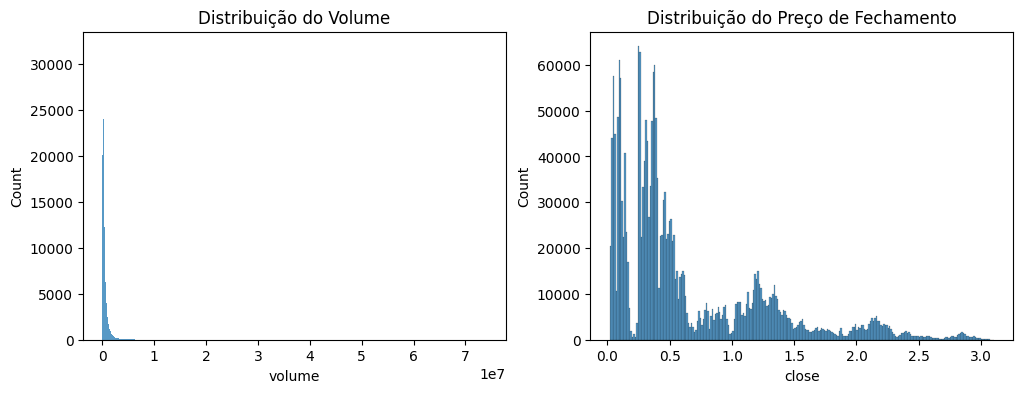

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar histogramas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=edited_data, x='volume', ax=axes[0])
sns.histplot(data=edited_data, x='close', ax=axes[1])

# Personalizar gráfico
axes[0].set_title('Distribuição do Volume')
axes[1].set_title('Distribuição do Preço de Fechamento')
plt.show()

[0.01774    0.04891434 0.08008869 0.11126303 0.14243737 0.17361172
 0.20478606 0.2359604  0.26713475 0.29830909 0.32948343 0.36065778
 0.39183212 0.42300646 0.45418081 0.48535515 0.51652949 0.54770384
 0.57887818 0.61005253 0.64122687 0.67240121 0.70357556 0.7347499
 0.76592424 0.79709859 0.82827293 0.85944727 0.89062162 0.92179596
 0.9529703  0.98414465 1.01531899 1.04649333 1.07766768 1.10884202
 1.14001636 1.17119071 1.20236505 1.23353939 1.26471374 1.29588808
 1.32706242 1.35823677 1.38941111 1.42058545 1.4517598  1.48293414
 1.51410848 1.54528283 1.57645717 1.60763152 1.63880586 1.6699802
 1.70115455 1.73232889 1.76350323 1.79467758 1.82585192 1.85702626
 1.88820061 1.91937495 1.95054929 1.98172364 2.01289798 2.04407232
 2.07524667 2.10642101 2.13759535 2.1687697  2.19994404 2.23111838
 2.26229273 2.29346707 2.32464141 2.35581576 2.3869901  2.41816444
 2.44933879 2.48051313 2.51168747 2.54286182 2.57403616 2.60521051
 2.63638485 2.66755919 2.69873354 2.72990788 2.76108222 2.792256

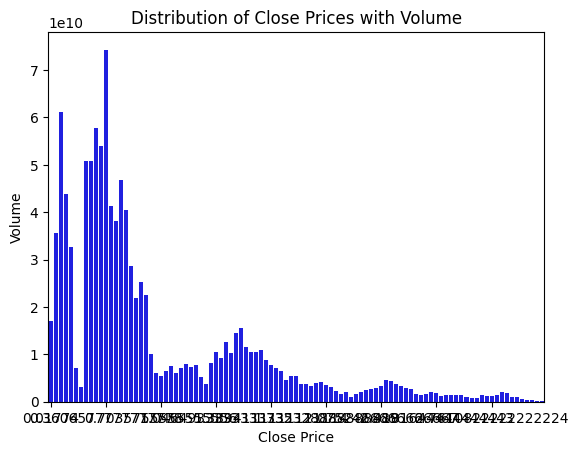

In [10]:
import numpy as np

precos_unicos = edited_data['close'].unique()

# Define bin edges (ensure they are monotonically increasing)
bins = np.linspace(precos_unicos.min(), precos_unicos.max(), 100)  # Example with 100 bins

# Calculate counts and bin edges
counts, bins = np.histogram(edited_data['close'], bins=bins)
print(bins)
# Use bin edges and counts as needed in your code...
volume_por_faixa = np.array([edited_data[edited_data['close'].between(b[0], b[1])]['volume'].sum() for b in zip(bins[:-1], bins[1:])])

# Create histogram
#plt.bar(bins[:-1], volume_por_faixa, width=bins[1] - bins[0])  # Adjust width for bin size
sns.barplot(x=bins[:-1], y=volume_por_faixa, color='blue')


# Add volume annotations
# for i in range(len(bins) - 1):
#     plt.annotate(f'{volume_por_faixa[i]:.2f}',  # Format volume values
#                  (bins[i], volume_por_faixa[i]),
#                  ha='center', va='bottom')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(11))
plt.xticks(rotation=45, minor=True)
#plt.xticks(rotation=45, labels=[bin[0], 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.50, 2.75, 3.0, bin[-1]])
# Customize labels
plt.xlabel('Close Price Intervals', fontsize=10)
#plt.xticks(['{:.2f}'.format(x) for x in bins[:-1]])

plt.xlabel('Close Price')  # Add labels for clarity
plt.ylabel('Volume')
plt.title('Distribution of Close Prices with Volume')

plt.show()



In [11]:
df = pd.DataFrame({'close': edited_data['close'], 'volume': edited_data['volume']})
bins = np.linspace(df['close'].min(), df['close'].max(), 100)  # Example with 100 bins
volume_por_faixa = df.groupby(pd.cut(df['close'], bins))['volume'].sum()

/tmp/ipykernel_14771/3980250697.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_por_faixa = df.groupby(pd.cut(df['close'], bins))['volume'].sum()


In [12]:
_mean = volume_por_faixa.mean() * 1.25
volume_por_faixa.loc[volume_por_faixa >= _mean].sort_values(ascending=False)

close
(0.361, 0.392]      7.430567e+10
(0.0801, 0.111]     6.111408e+10
(0.298, 0.329]      5.785604e+10
(0.329, 0.361]      5.407346e+10
(0.267, 0.298]      5.084071e+10
(0.236, 0.267]      5.083540e+10
(0.454, 0.485]      4.670032e+10
(0.111, 0.142]      4.384249e+10
(0.392, 0.423]      4.141084e+10
(0.485, 0.517]      4.049124e+10
(0.423, 0.454]      3.820684e+10
(0.0489, 0.0801]    3.570854e+10
(0.142, 0.174]      3.276441e+10
(0.517, 0.548]      2.869887e+10
(0.579, 0.61]       2.519371e+10
(0.61, 0.641]       2.257607e+10
(0.548, 0.579]      2.189701e+10
(0.0177, 0.0489]    1.712897e+10
(1.202, 1.234]      1.560378e+10
(1.171, 1.202]      1.452090e+10
Name: volume, dtype: float64

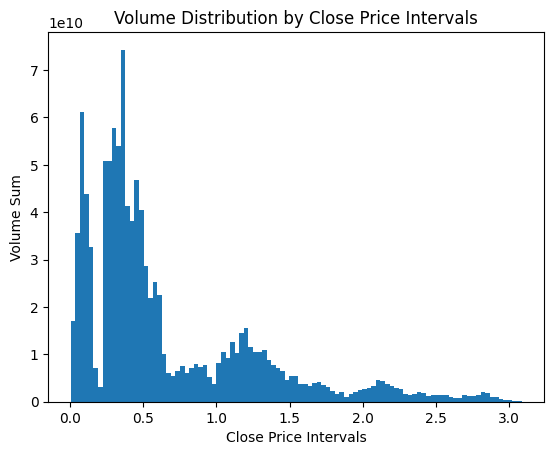

In [13]:
plt.bar(bins[:-1], volume_por_faixa, width=bins[1] - bins[0])

# Customize the plot
plt.xlabel('Close Price Intervals')
plt.ylabel('Volume Sum')
plt.title('Volume Distribution by Close Price Intervals')
plt.show()

## Plotando os níveis de liquidez no gráfico de candles.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mdates

In [136]:
data = pd.read_csv('save/ada_prices.csv', parse_dates=True, index_col='closetime')

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36233 entries, 2020-02-01 03:59:59.999000 to 2024-03-20 23:59:59.999000
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       36233 non-null  float64
 1   High       36233 non-null  float64
 2   Low        36233 non-null  float64
 3   Close      36233 non-null  float64
 4   Volume     36233 non-null  float64
 5   EMA        36233 non-null  float64
 6   RSI        36233 non-null  float64
 7   MACD       36233 non-null  float64
 8   BB_UPPER   36233 non-null  float64
 9   BB_MIDDLE  36233 non-null  float64
 10  BB_LOWER   36233 non-null  float64
dtypes: float64(11)
memory usage: 3.3 MB


In [85]:
data.shape

(36233, 11)

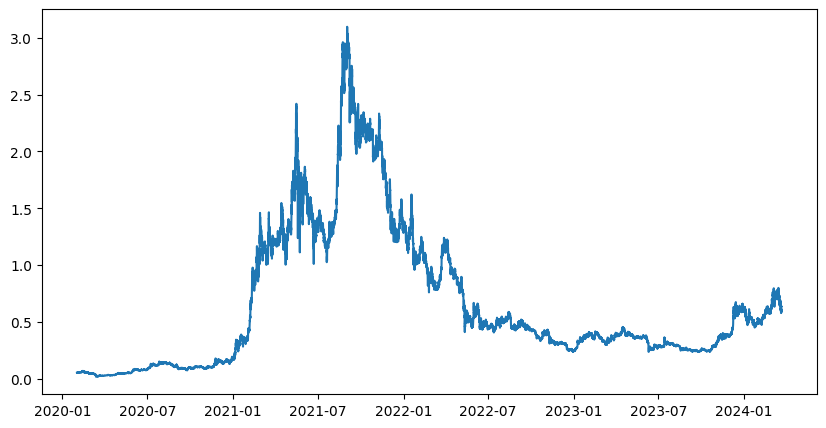

In [138]:
# x = data.index[0:20000]
# y = data['Close'][0:20000]
x = data.index
y = data['Close']
plt.figure(figsize=(10, 5))
plt.plot(x,y)

In [139]:
x = x.to_series(name='Date')

In [140]:
# Criando um dataset com os dados x e y
dataset = pd.concat([x, data], axis=1)
#dataset.columns =['x','y']

In [141]:
dataset.reset_index(drop=True, inplace=True)

In [142]:
dataset.drop('Date', axis=1, inplace=True)

In [143]:
dataset

,Open,High,Low,Close,Volume,EMA,RSI,MACD,BB_UPPER,BB_MIDDLE,BB_LOWER
0,0.05516,0.05538,0.05457,0.05482,13425624.0,0.054363,61.190849,0.000228,0.055416,0.053853,0.052291
1,0.05483,0.05540,0.05469,0.05495,13448954.0,0.054481,62.805730,0.000254,0.055479,0.053872,0.052265
2,0.05492,0.05508,0.05476,0.05480,11942184.0,0.054546,59.587184,0.000262,0.055490,0.053875,0.052261
3,0.05483,0.05506,0.05474,0.05478,11621543.0,0.054593,59.132637,0.000263,0.055553,0.053899,0.052244
4,0.05478,0.05523,0.05472,0.05492,9376922.0,0.054658,61.448525,0.000271,0.055651,0.053937,0.052224
...,...,...,...,...,...,...,...,...,...,...,...
36228,0.62350,0.63480,0.61960,0.63210,55752143.0,0.611113,66.441848,0.000264,0.627959,0.602170,0.576381
36229,0.63220,0.64390,0.62910,0.63720,51886076.0,0.616330,68.621508,0.002473,0.634163,0.604035,0.573907
36230,0.63720,0.64330,0.63530,0.64050,19606479.0,0.621164,70.038137,0.004439,0.639976,0.606595,0.573214
36231,0.64050,0.64450,0.63690,0.64010,26117765.0,0.624951,69.609596,0.005897,0.644989,0.608670,0.572351


In [52]:
tamanho_treino = int(len(data) * 0.70)
treino, teste = dataset[0:tamanho_treino], dataset[tamanho_treino:len(dataset)]

In [53]:
treino

,Open,High,Low,Close,Volume,EMA,RSI,MACD,BB_UPPER,BB_MIDDLE,BB_LOWER
0,0.05516,0.05538,0.05457,0.05482,13425624.0,0.054363,61.190849,0.000228,0.055416,0.053853,0.052291
1,0.05483,0.05540,0.05469,0.05495,13448954.0,0.054481,62.805730,0.000254,0.055479,0.053872,0.052265
2,0.05492,0.05508,0.05476,0.05480,11942184.0,0.054546,59.587184,0.000262,0.055490,0.053875,0.052261
3,0.05483,0.05506,0.05474,0.05478,11621543.0,0.054593,59.132637,0.000263,0.055553,0.053899,0.052244
4,0.05478,0.05523,0.05472,0.05492,9376922.0,0.054658,61.448525,0.000271,0.055651,0.053937,0.052224
...,...,...,...,...,...,...,...,...,...,...,...
25358,0.25940,0.26010,0.25810,0.25850,17731212.0,0.258709,51.474211,0.000980,0.261264,0.259005,0.256746
25359,0.25850,0.25960,0.25830,0.25920,9408914.0,0.258807,55.901382,0.000955,0.261245,0.259085,0.256925
25360,0.25920,0.25920,0.25830,0.25870,6164277.0,0.258786,52.083042,0.000885,0.261182,0.259035,0.256888
25361,0.25870,0.25950,0.25860,0.25940,6570342.0,0.258909,56.737259,0.000876,0.260783,0.258935,0.257087


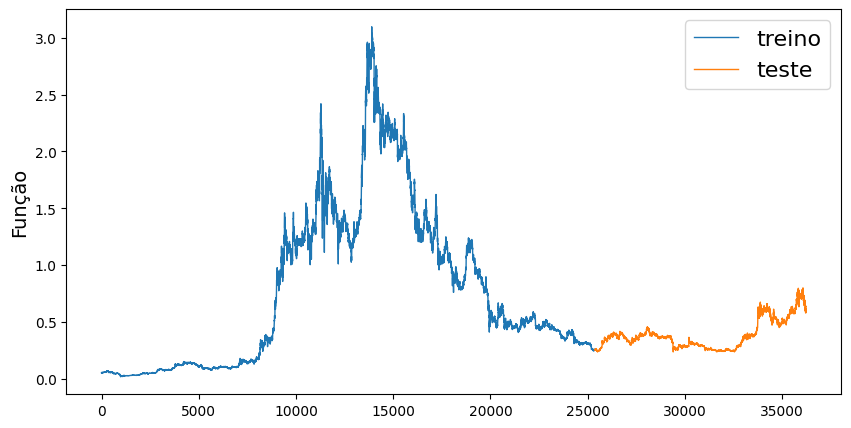

In [54]:
# Mostrando quais dados servirão para treino e para teste
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(treino['Close'], label='treino', linewidth=1)
ax.plot(teste['Close'], label='teste', linewidth=1)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16)

In [149]:
# Criando uma função para as janelas temporais. A saída será dois arrays, o primeiro contendo várias janelas do dataset, e o
# segundo contendo valores a serem previstos
def gera_dataset(dataset, tamanho_janela = 1, col_target_name = 'Close'):
    dataA, dataB = [], []
    for i in range(len(dataset)-tamanho_janela): # lembre-se que os datasets têm índices começando em zero
        a = dataset[i:(i+tamanho_janela)].copy()
        a.drop(col_target_name, axis=1, inplace=True)
        a = a.to_numpy()
        dataA.append(a)
        try:
            b = dataset['Close'].loc[[i+tamanho_janela]].to_numpy()
            #print(b)
            dataB.append(b)
        except KeyError:
            break 
    return np.asarray(dataA, dtype=np.float32), np.asarray(dataB, dtype=np.float32)

In [150]:
# Aplicando a função nos datasets de treino e teste que já criamos:
tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

In [151]:
x_treino.shape

(25353, 10, 10)

In [152]:
y_treino.shape

(25353, 1)

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import math
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['CUDA_VISIBLE_DEVICES']='-1'
os.environ["KERAS_BACKEND"] = 'tensorflow'

from keras.models import Sequential
from keras.layers import Dense

In [155]:
from sklearn.preprocessing import MinMaxScaler
# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset_norm = scaler.fit_transform(dataset.values) # o resultado dessa operação será um array de vetores
# Transformando esse resultado em um dataframe Pandas novamente:
dataset = pd.DataFrame(dataset_norm, index=dataset.index, columns=dataset.columns)

In [156]:
# Separando os dados em treino e teste
tamanho_treino = int(len(dataset) * 0.7)
treino, teste = dataset[0:tamanho_treino], dataset[tamanho_treino:len(dataset)]
treino = treino.reset_index(drop=True)
teste = teste.reset_index(drop=True) # Como depois iremos usar o comando .loc, precisaremos que os índices estejam iniciando em zero em ambos os dataframes

In [157]:
# Aplicando a função nos datasets de treino e teste que já criamos:
tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

In [158]:
print(x_treino.shape)
print(x_teste.shape)

(25353, 10, 10)
(10860, 10, 10)


In [16]:
treino

,Open,High,Low,Close,Volume,EMA,RSI,MACD,BB_UPPER,BB_MIDDLE,BB_LOWER
closetime,,,,,,,,,,,
2020-02-01 03:59:59.999,0.05516,0.05538,0.05457,0.011321,13425624.0,0.054363,61.190849,0.000228,0.055416,0.053853,0.052291
2020-02-01 04:59:59.999,0.05483,0.05540,0.05469,0.011363,13448954.0,0.054481,62.805730,0.000254,0.055479,0.053872,0.052265
2020-02-01 05:59:59.999,0.05492,0.05508,0.05476,0.011314,11942184.0,0.054546,59.587184,0.000262,0.055490,0.053875,0.052261
2020-02-01 06:59:59.999,0.05483,0.05506,0.05474,0.011308,11621543.0,0.054593,59.132637,0.000263,0.055553,0.053899,0.052244
2020-02-01 07:59:59.999,0.05478,0.05523,0.05472,0.011354,9376922.0,0.054658,61.448525,0.000271,0.055651,0.053937,0.052224
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 20:59:59.999,0.25940,0.26010,0.25810,0.077543,17731212.0,0.258709,51.474211,0.000980,0.261264,0.259005,0.256746
2022-12-23 21:59:59.999,0.25850,0.25960,0.25830,0.077771,9408914.0,0.258807,55.901382,0.000955,0.261245,0.259085,0.256925
2022-12-23 22:59:59.999,0.25920,0.25920,0.25830,0.077608,6164277.0,0.258786,52.083042,0.000885,0.261182,0.259035,0.256888


In [159]:
# Criando o modelo LSTM:
modelo = Sequential()
#modelo.add(LSTM(4, batch_input_shape = (2, x_treino.shape[1], x_treino.shape[2]), stateful = True))
modelo.add(LSTM(20, input_shape = (x_treino.shape[1], x_treino.shape[2])))


modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 128, verbose = 2)

Epoch 1/200
199/199 - 2s - 9ms/step - loss: 0.0108
Epoch 2/200
199/199 - 0s - 2ms/step - loss: 3.1024e-04
Epoch 3/200
199/199 - 0s - 2ms/step - loss: 1.6589e-04
Epoch 4/200
199/199 - 0s - 2ms/step - loss: 9.8979e-05
Epoch 5/200
199/199 - 0s - 2ms/step - loss: 6.9652e-05
Epoch 6/200
199/199 - 0s - 2ms/step - loss: 5.6755e-05
Epoch 7/200
199/199 - 0s - 2ms/step - loss: 5.0977e-05
Epoch 8/200
199/199 - 0s - 2ms/step - loss: 4.7710e-05
Epoch 9/200
199/199 - 0s - 2ms/step - loss: 4.5426e-05
Epoch 10/200
199/199 - 0s - 2ms/step - loss: 4.2636e-05
Epoch 11/200
199/199 - 0s - 2ms/step - loss: 4.0253e-05
Epoch 12/200
199/199 - 0s - 2ms/step - loss: 3.8622e-05
Epoch 13/200
199/199 - 0s - 2ms/step - loss: 3.7826e-05
Epoch 14/200
199/199 - 0s - 2ms/step - loss: 3.6474e-05
Epoch 15/200
199/199 - 0s - 2ms/step - loss: 3.5965e-05
Epoch 16/200
199/199 - 0s - 2ms/step - loss: 3.5449e-05
Epoch 17/200
199/199 - 0s - 2ms/step - loss: 3.4927e-05
Epoch 18/200
199/199 - 0s - 2ms/step - loss: 3.5734e-05
Epoch

In [46]:
modelo.save("save/lstm_price_predict.keras")

In [133]:
x_treino

array([[[0.0114444 , 0.01070128, 0.01219801, ..., 0.00959719,
         0.01009996, 0.01103901],
        [0.01133711, 0.01070776, 0.01223752, ..., 0.00961721,
         0.01010614, 0.01103016],
        [0.01136637, 0.01060396, 0.01226057, ..., 0.00962092,
         0.01010732, 0.01102857],
        ...,
        [0.011064  , 0.01033473, 0.01193792, ..., 0.00963182,
         0.0101864 , 0.01117876],
        [0.01103474, 0.01024714, 0.01169429, ..., 0.00963345,
         0.01018289, 0.01116982],
        [0.01090469, 0.010192  , 0.01180952, ..., 0.00962454,
         0.01019008, 0.01119412]],

       [[0.01133711, 0.01070776, 0.01223752, ..., 0.00961721,
         0.01010614, 0.01103016],
        [0.01136637, 0.01060396, 0.01226057, ..., 0.00962092,
         0.01010732, 0.01102857],
        [0.01133711, 0.01059747, 0.01225398, ..., 0.00964076,
         0.01011501, 0.011023  ],
        ...,
        [0.01103474, 0.01024714, 0.01169429, ..., 0.00963345,
         0.01018289, 0.01116982],
        [0.0

In [1]:
from sklearn.metrics import mean_squared_error

# Fazendo as previsões e avaliando a performance
previsoes_treino = modelo.predict(x_treino)
# A previsão tem como resultado um array de dimensões (n_amostras, 1), então se tentarmos executar o inverso da normalização
# diretamente com esses dados, teremos uma mensagem de erro, afinal a normalização foi aplicada em um dataset de dimensões:
# (n_amostras, 79), ou seja, a função scaler.inverse_transform não saberá o que fazer para gerar o inverso das outras 78 colunas.
# Portanto iremos primeiro gerar uma matriz com a mesma quantidade de colunas de x_treino (preenchida com zeros), depois iremos
# colocar o array de previsões em uma coluna dessa matriz (no lugar onde estava o price_actual), então poderemos aplicar a função
# scaler.inverse_transform e depois coletar somente a coluna que nos interessa.
# Obs: para descobrir qual o índice da coluna que possui a feature "price actual", basta utilizar o código: 
# treino.columns.get_loc("price actual")

# Previsões com os dados de treino:
previsoes_treino_dataset_size = np.zeros(shape=(len(previsoes_treino), x_treino.shape[2] +1))
previsoes_treino_dataset_size[:,-1] = previsoes_treino[:,0]
previsoes_treino = scaler.inverse_transform(previsoes_treino_dataset_size)[:,-1]

# Previsões com os dados de teste:
previsoes_teste = modelo.predict(x_teste)
previsoes_teste_dataset_size = np.zeros(shape=(len(previsoes_teste), x_teste.shape[2] +1))
previsoes_teste_dataset_size[:,-1] = previsoes_teste[:,0]
previsoes_teste = scaler.inverse_transform(previsoes_teste_dataset_size)[:,-1]

# Invertendo a normalização das variáveis target:
y_treino_dataset_size = np.zeros(shape=(len(y_treino), x_treino.shape[2] +1))
y_treino_dataset_size[:,-1] = y_treino[:,0]
y_treino = scaler.inverse_transform(y_treino_dataset_size)[:,-1]

y_teste_dataset_size = np.zeros(shape=(len(y_teste), x_teste.shape[2] +1))
y_teste_dataset_size[:,-1] = y_teste[:,0]
y_teste = scaler.inverse_transform(y_teste_dataset_size)[:,-1]

# Calculando o RMSE:
score_treino = math.sqrt(mean_squared_error(y_treino, previsoes_treino))
print('Score em Treino: %.2f RMSE' % (score_treino))  
score_teste = math.sqrt(mean_squared_error(y_teste, previsoes_teste))
print('Score em Teste: %.2f RMSE' % (score_teste))

NameError: name 'modelo' is not defined

In [162]:
previsoes_teste.shape

(10860,)

In [122]:
y_teste[1], previsoes_teste[2]

(0.2580999895788729, 0.26032788178175686)

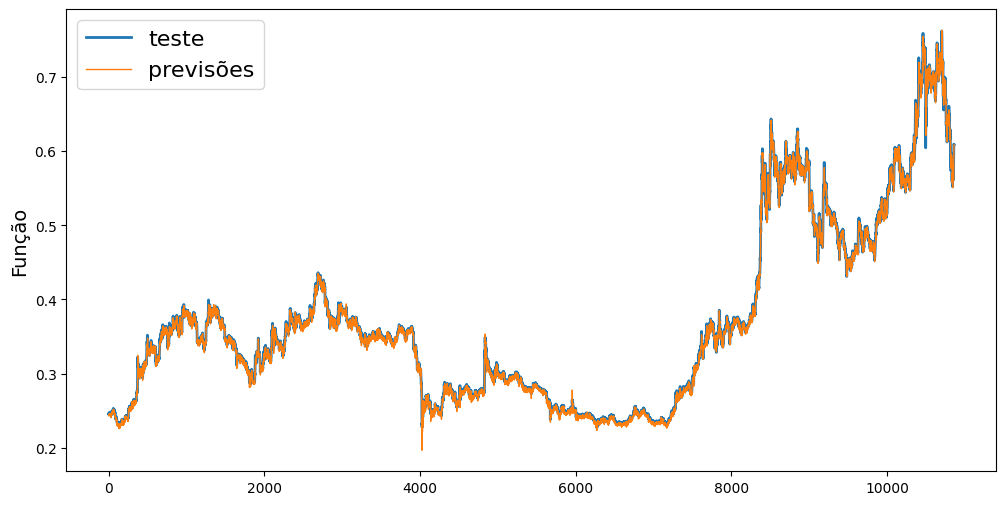

In [181]:
# Mostrando as previsões do modelo:
# previsto = teste[tamanho_janela:].copy()  
# previsto['Close'] = previsoes_teste # coloca os valores das previsoes do modelo dentro dessa variável
fig, ax = plt.subplots(1, figsize=(12, 6))
# treino['Close'] = scaler.inverse_transform(treino['Close'].values.reshape(-1,1))
# teste['Close'] = scaler.inverse_transform(teste['Close'].values.reshape(-1,1))
#ax.plot(y_treino, label='treino', linewidth=2)
ax.plot(y_teste, label='teste', linewidth=2)
ax.plot(previsoes_teste, label='previsões', linewidth=1)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16)

In [189]:
signals_treino = []
for i in range(len(y_treino) -1):
    if i == 0:
        if previsoes_treino[i] > y_treino[i]:
            signals_treino.append(1)
        elif previsoes_treino[i] < y_treino[i]:
            signals_treino.append(-1)
        else:
            signals_treino.append(0)
    elif i > 0:
        if previsoes_treino[i] > previsoes_treino[i-1]:
            signals_treino.append(1)
        elif previsoes_treino[i] < previsoes_treino[i-1]:
            signals_treino.append(-1)
        else:
            signals_treino.append(0)
            

 
signals_teste = []
for i in range(len(y_teste) -1):
    if i == 0:
        if previsoes_teste[i] > y_teste[i]:
            signals_teste.append(1)
        elif previsoes_teste[i] < y_teste[i]:
            signals_teste.append(-1)
        else:
            signals_teste.append(0)
    elif i > 0:
        if previsoes_teste[i] > previsoes_teste[i-1]:
            signals_teste.append(1)
        elif previsoes_teste[i] < previsoes_teste[i-1]:
            signals_teste.append(-1)
        else:
            signals_teste.append(0)

In [199]:
signals_treino.count(1), signals_treino.count(-1), signals_treino.count(0), len(signals_treino)

(12471, 12881, 0, 25352)

In [200]:
signals_teste.count(1), signals_teste.count(-1), signals_teste.count(0), len(signals_teste)

(5442, 5417, 0, 10859)

In [206]:
signals_treino_fake = []
for i in range(11):
    next_price = dataset['Close'][i+1]
    #print(next_price)
    if next_price > dataset['Close'][i]:
        signals_treino_fake.append(1)
    elif next_price < dataset['Close'][i]:
        signals_treino_fake.append(-1)
    else:
        signals_treino_fake.append(0)

signals_treino_fake, len(signals_treino_fake)

([1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1], 11)

In [208]:
signals_teste_fake = []
for i in range(11):
    next_price = dataset['Close'][25363+i+1]
    #print(next_price)
    if next_price > dataset['Close'][25363+i]:
        signals_teste_fake.append(1)
    elif next_price < dataset['Close'][25363+i]:
        signals_teste_fake.append(-1)
    else:
        signals_teste_fake.append(0)

signals_teste_fake, len(signals_teste_fake)

([1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1], 11)

In [210]:
signals =  signals_treino_fake + signals_treino + signals_teste_fake + signals_teste

In [213]:
data['Signals'] = signals

In [216]:
data

,Open,High,Low,Close,Volume,EMA,RSI,MACD,BB_UPPER,BB_MIDDLE,BB_LOWER,Signals
closetime,,,,,,,,,,,,
2020-02-01 03:59:59.999,0.05516,0.05538,0.05457,0.05482,13425624.0,0.054363,61.190849,0.000228,0.055416,0.053853,0.052291,1
2020-02-01 04:59:59.999,0.05483,0.05540,0.05469,0.05495,13448954.0,0.054481,62.805730,0.000254,0.055479,0.053872,0.052265,-1
2020-02-01 05:59:59.999,0.05492,0.05508,0.05476,0.05480,11942184.0,0.054546,59.587184,0.000262,0.055490,0.053875,0.052261,-1
2020-02-01 06:59:59.999,0.05483,0.05506,0.05474,0.05478,11621543.0,0.054593,59.132637,0.000263,0.055553,0.053899,0.052244,1
2020-02-01 07:59:59.999,0.05478,0.05523,0.05472,0.05492,9376922.0,0.054658,61.448525,0.000271,0.055651,0.053937,0.052224,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-20 19:59:59.999,0.62350,0.63480,0.61960,0.63210,55752143.0,0.611113,66.441848,0.000264,0.627959,0.602170,0.576381,1
2024-03-20 20:59:59.999,0.63220,0.64390,0.62910,0.63720,51886076.0,0.616330,68.621508,0.002473,0.634163,0.604035,0.573907,1
2024-03-20 21:59:59.999,0.63720,0.64330,0.63530,0.64050,19606479.0,0.621164,70.038137,0.004439,0.639976,0.606595,0.573214,1


In [215]:
data.to_csv('save/ada_prices_signals.csv')

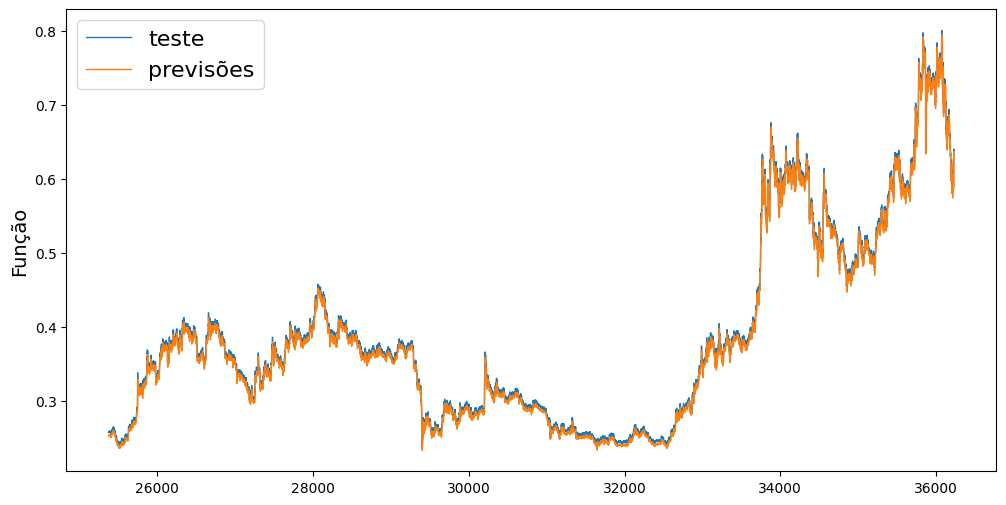

In [43]:
# Olhando mais de perto:

fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(teste['y'][tamanho_janela:], label='teste', linewidth=1)
ax.plot(previsto['y'], label='previsões', linewidth=1)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16)

In [49]:
teste['y'][tamanho_janela:], previsto['y']

(25373    0.2576
 25374    0.2581
 25375    0.2579
 25376    0.2581
 25377    0.2582
           ...  
 36228    0.6321
 36229    0.6372
 36230    0.6405
 36231    0.6401
 36232    0.6399
 Name: y, Length: 10860, dtype: float64,
 25373    0.252827
 25374    0.252954
 25375    0.253437
 25376    0.253348
 25377    0.253546
            ...   
 36228    0.615082
 36229    0.624981
 36230    0.631198
 36231    0.635203
 36232    0.635240
 Name: y, Length: 10860, dtype: float32,
 25363    0.2590
 25364    0.2594
 25365    0.2598
 25366    0.2594
 25367    0.2591
           ...  
 36228    0.6321
 36229    0.6372
 36230    0.6405
 36231    0.6401
 36232    0.6399
 Name: y, Length: 10870, dtype: float64)

In [26]:
rs = main_volume_por_bin

In [34]:
rs.index.categories

IntervalIndex([  (0.02, 0.0511], (0.0511, 0.0821],  (0.0821, 0.113],
                 (0.113, 0.144],   (0.144, 0.175],   (0.175, 0.206],
                 (0.206, 0.237],   (0.237, 0.269],     (0.269, 0.3],
                   (0.3, 0.331],   (0.331, 0.362],   (0.362, 0.393],
                 (0.393, 0.424],   (0.424, 0.455],   (0.455, 0.486],
                 (0.486, 0.517],   (0.517, 0.548],   (0.548, 0.579],
                  (0.579, 0.61],    (0.61, 0.641],   (0.641, 0.672],
                 (0.672, 0.703],   (0.703, 0.735],   (0.735, 0.766],
                 (0.766, 0.797],   (0.797, 0.828],   (0.828, 0.859],
                  (0.859, 0.89],    (0.89, 0.921],   (0.921, 0.952],
                 (0.952, 0.983],   (0.983, 1.014],   (1.014, 1.045],
                 (1.045, 1.076],   (1.076, 1.107],   (1.107, 1.138],
                  (1.138, 1.17],    (1.17, 1.201],   (1.201, 1.232],
                 (1.232, 1.263],   (1.263, 1.294],   (1.294, 1.325],
                 (1.325, 1.356],  

In [27]:
rs_plots = [mpf.make_addplot(rs, scatter=True, color='green')]

/home/antonio/binance/venv/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


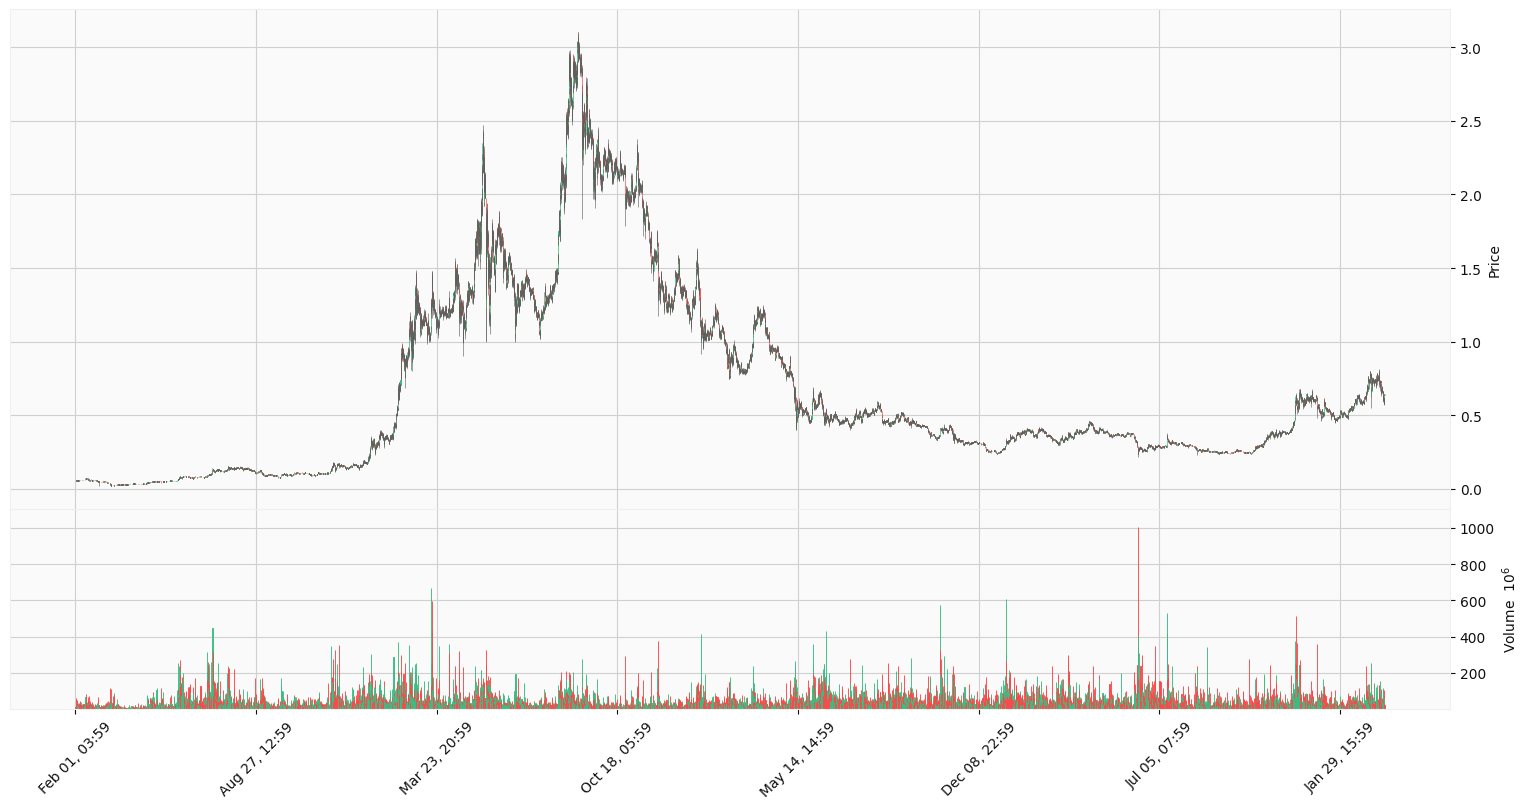

In [15]:
mpf.plot(
    data,
    volume=True,
    type="candle",
    style="yahoo",
    addplot=rs_plots,
    figsize=(20,10),
)

In [4]:
# Definir número de bins (ajuste conforme necessário)
num_bins = 100

# Criar bins com base nos preços de fechamento
bins = np.linspace(data['Close'].min(), data['Close'].max(), num_bins)

In [5]:
# Agrupar por bins e calcular volume total por bin
volume_por_bin = data.groupby(pd.cut(data['Close'], bins))['Volume'].sum()

/tmp/ipykernel_6747/3523298096.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_por_bin = data.groupby(pd.cut(data['Close'], bins))['Volume'].sum()


In [6]:
_mean = volume_por_bin.mean() * 1.25
main_volume_por_bin = volume_por_bin.loc[volume_por_bin >= _mean].sort_values(ascending=False)

In [7]:
main_volume_por_bin

Close
(0.362, 0.393]      7.348843e+10
(0.3, 0.331]        5.827163e+10
(0.0821, 0.113]     5.573916e+10
(0.331, 0.362]      5.561485e+10
(0.237, 0.269]      5.355377e+10
(0.269, 0.3]        4.922310e+10
(0.455, 0.486]      4.580931e+10
(0.113, 0.144]      4.532540e+10
(0.486, 0.517]      4.104125e+10
(0.393, 0.424]      4.004882e+10
(0.424, 0.455]      3.864262e+10
(0.0511, 0.0821]    3.708418e+10
(0.144, 0.175]      2.993285e+10
(0.517, 0.548]      2.750221e+10
(0.61, 0.641]       2.405626e+10
(0.579, 0.61]       2.370097e+10
(0.548, 0.579]      2.280534e+10
(0.02, 0.0511]      2.259566e+10
(1.201, 1.232]      1.541526e+10
(1.17, 1.201]       1.435293e+10
Name: Volume, dtype: float64

/tmp/ipykernel_6747/364382158.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_per_bin = data.groupby(pd.cut(data['Close'], bins))['Volume'].sum()


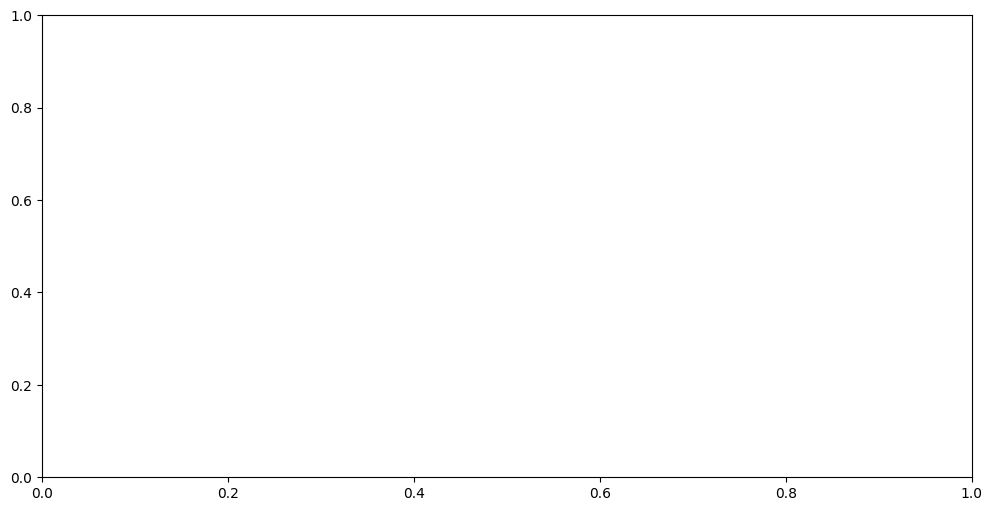

In [8]:
# Define number of bins
num_bins = 100

# Create bins based on closing prices
bins = np.linspace(data['Close'].min(), data['Close'].max(), num_bins)

# Calculate volume per bin
volume_per_bin = data.groupby(pd.cut(data['Close'], bins))['Volume'].sum()

# Configure plot
fig, ax = plt.subplots(figsize=(12, 6))

In [9]:
cmap = plt.cm.get_cmap('RdGy')  # Choose a colormap (RdGy represents red for down, gray for flat, green for up)
color = cmap((data['Close'] - data['Open']) / (data['Close'].max() - data['Close'].min()))


/tmp/ipykernel_6747/2598938926.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdGy')  # Choose a colormap (RdGy represents red for down, gray for flat, green for up)


[[0.40392157 0.         0.12156863 1.        ]
 [0.40392157 0.         0.12156863 1.        ]
 [0.40392157 0.         0.12156863 1.        ]
 ...
 [0.40392157 0.         0.12156863 1.        ]
 [0.40392157 0.         0.12156863 1.        ]
 [0.40392157 0.         0.12156863 1.        ]]


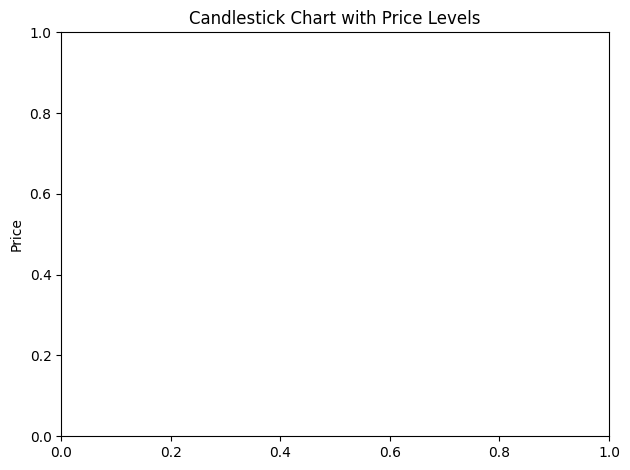

In [25]:
print(color)

# Plot candlesticks
ax.bar(data.index, data['Close'], bottom=data['Open'], color='black', width=0.6)

# Obter os limites dos bins
bin_left = pd.cut(data['Close'], bins).values.categories.left
bin_right = pd.cut(data['Close'], bins).values.categories.right

# Calcular centros dos bins
bin_centers = (bin_left + bin_right) / 2
#print(bin_centers)

for bin_center in bin_centers:
    ax.axhline(bin_center, color='gray', linestyle='--', alpha=0.7, zorder=1)

# Annotate price levels (optional)
# for i, bin_center in enumerate(bin_centers):
#     ax.text(i, bin_center, f'{bin_center:.2f}', ha='center', va='bottom', alpha=0.7, zorder=2)

# Customize x-axis labels
# ax.xaxis.set_major_locator(mdates.DayLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set title and labels
plt.title('Candlestick Chart with Price Levels')
plt.ylabel('Price')

# Tight layout and display plot
plt.tight_layout()
plt.show()




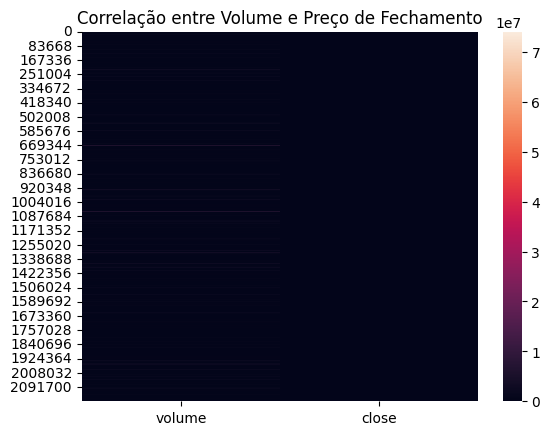

In [14]:
# Calcular correlação
corr = edited_data['volume'].corr(edited_data['close'])

# Criar heatmap
sns.heatmap(data=edited_data[['volume', 'close']], fmt='.2f')
plt.title('Correlação entre Volume e Preço de Fechamento')
plt.show()

In [14]:
from time import time
time()

1710786928.3303554

# Data preparation for treinning


In [1]:
from whales import engine_futures, db_path_futures
from sqlalchemy.orm import Session
from sqlalchemy import text
from models.histpricemodel import HistPrice
import pandas as pd

from datetime import datetime



with Session(engine_futures) as session:
    _query = text("SELECT * FROM histprice;")
    #resultados = session.execute(_query).all()
    dados = pd.read_sql(sql=_query, con=engine_futures)
    #print(dados[:9])

Database already exists... continue...
2024-03-27 09:20:39,079 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-27 09:20:39,080 INFO sqlalchemy.engine.Engine SELECT * FROM histprice;
2024-03-27 09:20:39,080 INFO sqlalchemy.engine.Engine [generated in 0.00080s] ()


/tmp/ipykernel_6281/3530637548.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


2024-03-27 09:20:49,647 INFO sqlalchemy.engine.Engine ROLLBACK


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
dados[:10]

,id,pair,opentime,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,takerbuyquoteassetvolume,ignore
0,1,BTCUSDT,1603411200000,12970.39,12973.32,12948.89,12952.79,289.993,1603411259999,3.757987e+06,973,66.854,8.667802e+05,0
1,2,BTCUSDT,1603411260000,12954.91,12957.29,12941.25,12942.00,240.087,1603411319999,3.109607e+06,876,77.269,1.001089e+06,0
2,3,BTCUSDT,1603411320000,12942.01,12946.00,12925.05,12926.00,552.027,1603411379999,7.140541e+06,1528,155.567,2.012898e+06,0
3,4,BTCUSDT,1603411380000,12925.48,12929.01,12900.00,12928.89,2308.230,1603411439999,2.980722e+07,4768,972.930,1.256562e+07,0
4,5,BTCUSDT,1603411440000,12928.88,12936.93,12921.00,12922.11,445.645,1603411499999,5.761356e+06,1438,217.529,2.812393e+06,0
5,6,BTCUSDT,1603411500000,12922.11,12944.47,12920.00,12942.76,244.973,1603411559999,3.168503e+06,1060,193.661,2.504901e+06,0
6,7,BTCUSDT,1603411560000,12942.10,12943.15,12931.00,12934.73,175.803,1603411619999,2.274211e+06,757,69.609,9.004968e+05,0
7,8,BTCUSDT,1603411620000,12934.73,12934.73,12906.33,12920.45,269.921,1603411679999,3.486878e+06,999,51.518,6.656254e+05,0
8,9,BTCUSDT,1603411680000,12920.44,12925.00,12910.01,12911.01,231.300,1603411739999,2.987687e+06,983,97.199,1.255382e+06,0
9,10,BTCUSDT,1603411740000,12911.01,12913.13,12891.03,12892.50,479.556,1603411799999,6.186899e+06,1428,117.092,1.510995e+06,0


In [4]:
ada_prices = dados.query("pair == 'ADAUSDT'").copy()
eth_prices = dados.query("pair == 'ETHUSDT'").copy()
btc_prices = dados.query("pair == 'BTCUSDT'").copy()

In [5]:
dados = ''

In [5]:
dados

''

In [5]:
ada_prices.shape[0]

2175359

In [6]:
ada_prices[0]

KeyError: 0

In [8]:
ada_prices['opentime']

7770240    1704931200000
7770241    1704931260000
7770242    1704931320000
7770243    1704931380000
7770244    1704931440000
               ...      
9945594    1619222100000
9945595    1619222160000
9945596    1619222220000
9945597    1619222280000
9945598    1619222340000
Name: opentime, Length: 2175359, dtype: int64

In [4]:
def concatDfsAtTime(df1 : pd.DataFrame, df2 : pd.DataFrame):
    df = pd.DataFrame()
    opentime_df1_list = df1['opentime'].to_list()
    prefix_df1 = df1['pair'].min()
    prefix_df2 = df2['pair'].min()
    for i in range(df1.shape[0]):
        opentime_df1_actual = opentime_df1_list[i]
        df_tmp = df2.query(f"opentime <= {opentime_df1_actual} and closetime >= {opentime_df1_actual}")
        df_tmp.columns = [f"{prefix_df2}_" + col for col in df_tmp.columns]
        df1_actual_line = df1.loc[df1['opentime'] == opentime_df1_actual].reset_index()
        df1_actual_line.columns = [f"{prefix_df1}_" + col for col in df1_actual_line.columns]
        df_tmp_line = pd.concat([df1_actual_line, df_tmp.reset_index()], axis=1)
        df = pd.concat([df, df_tmp_line], axis=0)
        #print(df.shape)
        #break
        
    return df
    

In [ ]:

test_df = concatDfsAtTime(ada_prices, eth_prices)

In [6]:
test_df = pd.merge(eth_prices, btc_prices, on='closetime', how='inner', suffixes=['_df1', '_df2'])

In [7]:
combined_df = pd.merge(ada_prices, test_df, on='closetime', how='inner')

In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185248 entries, 0 to 185247
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            185248 non-null  int64  
 1   pair                          185248 non-null  object 
 2   opentime                      185248 non-null  int64  
 3   open                          185248 non-null  float64
 4   high                          185248 non-null  float64
 5   low                           185248 non-null  float64
 6   close                         185248 non-null  float64
 7   volume                        185248 non-null  float64
 8   closetime                     185248 non-null  int64  
 9   quoteassetvolume              185248 non-null  float64
 10  numberoftrades                185248 non-null  int64  
 11  takerbuybaseassetvolume       185248 non-null  float64
 12  takerbuyquoteassetvolume      185248 non-nul

In [9]:
combined_df.loc[:, ['opentime', 'opentime_df1', 'opentime_df2']]

,opentime,opentime_df1,opentime_df2
0,1681516800000,1681518540000,1681518540000
1,1681516800000,1681518540000,1681516800000
2,1681516800000,1681516800000,1681518540000
3,1681516800000,1681516800000,1681516800000
4,1681518600000,1681520340000,1681520340000
...,...,...,...
185243,1709593200000,1709593200000,1709593200000
185244,1709595000000,1709596740000,1709596740000
185245,1709595000000,1709596740000,1709595000000
185246,1709595000000,1709595000000,1709596740000


In [10]:
combined_df['closetime'] = [datetime.fromtimestamp(time/1000) for time in combined_df['closetime']]

In [11]:
combined_df.drop_duplicates(subset='closetime', keep='first', inplace=True)

In [12]:
combined_df = combined_df.drop(['id', 'pair', 'opentime', 'ignore', 'id_df1', 'pair_df1', 'opentime_df1', 'ignore_df1', 'id_df2', 'pair_df2', 'opentime_df2', 'ignore_df2'], axis=1)

In [13]:
combined_df = combined_df.set_index('closetime')

In [14]:
combined_df.sort_index(axis=0, ascending=True, inplace=True)

In [15]:
combined_df

,open,high,low,close,volume,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,takerbuyquoteassetvolume,open_df1,high_df1,low_df1,close_df1,volume_df1,quoteassetvolume_df1,numberoftrades_df1,takerbuybaseassetvolume_df1,takerbuyquoteassetvolume_df1,open_df2,high_df2,low_df2,close_df2,volume_df2,quoteassetvolume_df2,numberoftrades_df2,takerbuybaseassetvolume_df2,takerbuyquoteassetvolume_df2
closetime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-31 08:29:59.999,0.05450,0.05452,0.05374,0.05393,5939138.0,3.205505e+05,3411,3152580.0,1.701450e+05,182.67,182.92,181.65,182.76,8758.572,1.595700e+06,1312,4088.973,7.450200e+05,9382.13,9384.82,9380.00,9380.27,36.216,3.397720e+05,134,9.824,9.218343e+04
2020-01-31 08:59:59.999,0.05393,0.05494,0.05386,0.05458,8146706.0,4.436321e+05,1689,4605465.0,2.508757e+05,182.73,183.50,182.68,183.13,6587.573,1.206534e+06,899,3109.489,5.695380e+05,9387.20,9387.20,9385.89,9386.81,21.168,1.986957e+05,44,20.193,1.895439e+05
2020-01-31 09:29:59.999,0.05459,0.05559,0.05457,0.05481,9945274.0,5.481962e+05,2055,5769263.0,3.181497e+05,183.13,184.00,183.06,183.49,8553.780,1.569964e+06,1018,4246.621,7.794819e+05,9401.60,9405.15,9400.36,9401.50,60.250,5.665009e+05,152,31.456,2.957721e+05
2020-01-31 09:59:59.999,0.05466,0.05496,0.05450,0.05473,7262962.0,3.972245e+05,1650,3752610.0,2.053545e+05,183.49,183.50,182.33,182.55,9305.172,1.703350e+06,1143,4209.854,7.704455e+05,9372.73,9373.42,9359.00,9369.65,423.653,3.967249e+06,464,47.788,4.476955e+05
2020-01-31 10:29:59.999,0.05472,0.05484,0.05421,0.05453,8492516.0,4.628669e+05,1952,4197424.0,2.288950e+05,182.57,182.61,181.36,182.37,20012.289,3.643919e+06,2248,10458.888,1.904155e+06,9373.36,9375.58,9370.01,9374.71,49.055,4.597739e+05,82,34.595,3.242411e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-20 21:59:59.999,0.64090,0.64190,0.63760,0.64050,7004560.0,4.479432e+06,11163,3553947.0,2.273374e+06,3497.05,3501.24,3494.86,3501.24,790.077,2.763157e+06,1515,514.094,1.798060e+06,67674.70,67728.80,67639.60,67716.90,135.812,9.191399e+06,2032,88.492,5.988955e+06
2024-03-20 22:29:59.999,0.64050,0.64450,0.63910,0.64060,14678311.0,9.417419e+06,20008,6788230.0,4.355607e+06,3509.82,3513.20,3505.84,3507.40,3071.244,1.077909e+07,4005,1496.022,5.250679e+06,67768.60,67844.00,67729.70,67746.90,208.967,1.416323e+07,3170,94.524,6.407009e+06
2024-03-20 22:59:59.999,0.64070,0.64190,0.63690,0.64010,11439454.0,7.316328e+06,16061,5057439.0,3.235288e+06,3527.47,3527.93,3523.40,3523.47,2122.723,7.483872e+06,3600,841.906,2.968147e+06,67759.80,67759.90,67699.10,67714.50,273.831,1.854591e+07,3610,86.255,5.841272e+06


In [29]:
combined_df = combined_df.resample('30T').agg({'close': 'ohlc'})

/tmp/ipykernel_24856/1099555365.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  combined_df = combined_df.resample('30T').agg({'close': 'ohlc'})


In [30]:
combined_df

close                           
                        open     high      low    close
closetime                                              
2020-01-31 08:00:00  0.05450  0.05450  0.05382  0.05393
2020-01-31 08:30:00  0.05393  0.05486  0.05393  0.05458
2020-01-31 09:00:00  0.05468  0.05544  0.05466  0.05481
2020-01-31 09:30:00  0.05481  0.05494  0.05454  0.05473
2020-01-31 10:00:00  0.05469  0.05480  0.05426  0.05453
...                      ...      ...      ...      ...
2024-03-20 21:30:00  0.64100  0.64180  0.63770  0.64050
2024-03-20 22:00:00  0.64100  0.64420  0.63940  0.64060
2024-03-20 22:30:00  0.64180  0.64180  0.63700  0.64010
2024-03-20 23:00:00  0.63890  0.64250  0.63730  0.64070
2024-03-20 23:30:00  0.64070  0.64100  0.63800  0.63990

[72512 rows x 4 columns]

In [ ]:
!pip install git+https://github.com/DLR-RM/stable-baselines3@feat/gymnasium-support
!pip install git+https://github.com/Stable-Baselines-Team/stable-baselines3-contrib@feat/gymnasium-support

In [ ]:
!pip install gym-anytrading

In [16]:
# Gym stuff
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv, TradingEnv

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from stable_baselines3.common.sb2_compat.rmsprop_tf_like import RMSpropTFLike
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit_transform(combined_df)

array([[0.01150621, 0.0108683 , 0.01190085, ..., 0.00117668, 0.00076233,
        0.00024517],
       [0.01132094, 0.01100447, 0.01194028, ..., 0.00038637, 0.00156695,
        0.00050411],
       [0.01153546, 0.01121523, 0.01217356, ..., 0.00133474, 0.00244095,
        0.00078663],
       ...,
       [0.20204121, 0.20131639, 0.20351046, ..., 0.03170004, 0.00669328,
        0.01553529],
       [0.2018787 , 0.20157577, 0.20354331, ..., 0.02180365, 0.00634145,
        0.01475391],
       [0.20200871, 0.20121912, 0.20374046, ..., 0.02545662, 0.00561411,
        0.01306543]])

In [47]:
#combined_df = scaler.fit_transform(combined_df)

In [18]:
combined_df = pd.DataFrame(scaler.fit_transform(combined_df), columns=combined_df.columns)

In [19]:
combined_df

,open,high,low,close,volume,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,takerbuyquoteassetvolume,open_df1,high_df1,low_df1,close_df1,volume_df1,quoteassetvolume_df1,numberoftrades_df1,takerbuybaseassetvolume_df1,takerbuyquoteassetvolume_df1,open_df2,high_df2,low_df2,close_df2,volume_df2,quoteassetvolume_df2,numberoftrades_df2,takerbuybaseassetvolume_df2,takerbuyquoteassetvolume_df2
0,0.011506,0.010868,0.011901,0.011347,0.010728,0.000509,0.004912,0.012347,0.000603,0.018279,0.017677,0.020469,0.018298,0.005466,0.000493,0.000764,0.004688,0.000485,0.076872,0.075825,0.077928,0.076419,0.001755,0.000564,0.001177,0.000762,0.000245
1,0.011321,0.011004,0.011940,0.011558,0.014716,0.000704,0.002432,0.018037,0.000889,0.018292,0.017798,0.020686,0.018375,0.004111,0.000372,0.000523,0.003565,0.000371,0.076945,0.075859,0.078013,0.076513,0.001026,0.000330,0.000386,0.001567,0.000504
2,0.011535,0.011215,0.012174,0.011633,0.017965,0.000870,0.002959,0.022595,0.001127,0.018376,0.017903,0.020765,0.018451,0.005338,0.000485,0.000593,0.004868,0.000508,0.077152,0.076117,0.078220,0.076724,0.002920,0.000941,0.001335,0.002441,0.000787
3,0.011558,0.011011,0.012151,0.011607,0.013120,0.000630,0.002376,0.014697,0.000728,0.018451,0.017798,0.020612,0.018253,0.005807,0.000526,0.000666,0.004826,0.000502,0.076737,0.075661,0.077627,0.076267,0.020531,0.006591,0.004074,0.003708,0.001191
4,0.011578,0.010972,0.012055,0.011542,0.015341,0.000734,0.002811,0.016439,0.000811,0.018258,0.017612,0.020408,0.018216,0.012488,0.001125,0.001309,0.011990,0.001241,0.076746,0.075693,0.077785,0.076339,0.002377,0.000764,0.000720,0.002685,0.000862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72499,0.202106,0.201316,0.203740,0.201997,0.012653,0.007107,0.016074,0.013919,0.008055,0.715123,0.712017,0.716617,0.715992,0.000493,0.000853,0.000882,0.000589,0.001172,0.913753,0.913676,0.914034,0.914810,0.006582,0.015269,0.017843,0.006867,0.015928
72500,0.201976,0.202159,0.204233,0.202029,0.026515,0.014941,0.028810,0.026586,0.015433,0.717808,0.714519,0.718924,0.717287,0.001917,0.003327,0.002332,0.001715,0.003421,0.915101,0.915330,0.915327,0.915241,0.010127,0.023529,0.027836,0.007335,0.017040
72501,0.202041,0.201316,0.203510,0.201867,0.020664,0.011608,0.023127,0.019807,0.011464,0.721519,0.717602,0.722613,0.720666,0.001325,0.002310,0.002096,0.000965,0.001934,0.914975,0.914123,0.914888,0.914775,0.013270,0.030810,0.031700,0.006693,0.015535
72502,0.201879,0.201576,0.203543,0.202062,0.025259,0.014206,0.023248,0.033743,0.019553,0.721832,0.718384,0.723782,0.721925,0.000781,0.001363,0.001322,0.000716,0.001437,0.916441,0.916275,0.917224,0.917106,0.008204,0.019091,0.021804,0.006341,0.014754


In [20]:
#Create a function to properly format data frame to be passed through environment
def signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:,'close'].to_numpy()[start:end]
    signal_features = env.df.loc[:, combined_df.columns].to_numpy()[start:end]
    return prices, signal_features

In [21]:
#Replace default data process with custom function from above
class MyCustomEnv(StocksEnv):
    _process_data = signals

#Initialize an environment setting the window size and train data
window_size = 10
start_index = window_size
end_train_index = round(len(combined_df)*0.80)
end_val_index = len(combined_df)

env2 = MyCustomEnv(df=combined_df, window_size=window_size, frame_bound=(start_index, end_train_index))

In [22]:
#Create a Dummy Vector of our environment
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [23]:
#initialize our model and train
from tqdm import tqdm
policy_kwargs = dict(optimizer_class=RMSpropTFLike, optimizer_kwargs=dict(eps=1e-5))
ppo = PPO('MlpPolicy', env, policy_kwargs=policy_kwargs, verbose=1, normalize_advantage=True, batch_size=32, n_epochs=1000)
ppo.learn(total_timesteps=4_000_000, progress_bar=True)

Using cuda device


/home/antonio/binance/venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/antonio/binance/venv/lib/python3.10/site-packages/gym_anytrading/envs/stocks_env.py:61: RuntimeWarning: 
divide by zero encountered in scalar divide
  shares = (self._total_profit * (1 - self.trade_fee_ask_percent)) / last_trade_price

-----------------------------
| time/              |      |
|    fps             | 909  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 2           |
|    time_elapsed         | 190         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009755885 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | -1.99       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0365     |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.0185     |
|    value_loss           | 1.68e-05    |
-----------------------------------------
----------------------------------

KeyboardInterrupt: 

In [24]:
#Create a new environment with validation data
env = MyCustomEnv(df=combined_df, window_size=window_size, frame_bound=(end_train_index, end_val_index))
vec_env = ppo.get_env()
obs = vec_env.reset()

In [25]:
import numpy as np

In [26]:
while True:
    #obs = obs[np.newaxis, ...]
    action, _states = ppo.predict(obs)
    obs, rewards, done, info = vec_env.step(action)
    if done:
        print("info", info)
        break

In [91]:
from matplotlib import pyplot as plt

#Plot the results
plt.figure(figsize=(16,9))
vec_env.render(mode=None)
plt.show()

<Figure size 1600x900 with 0 Axes>